<a href="https://colab.research.google.com/github/Devil-Echo/Malaria-detection/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


ys = 200+np.random.randn(100)
x = [x for x in range(len(ys))]

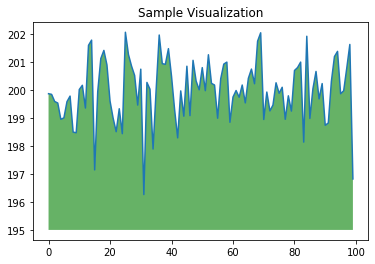

In [ ]:
plt.plot(x,ys,'-')
plt.fill_between(x,ys,195,where = (ys>195), facecolor = 'g',alpha=0.6)
plt.title("Sample Visualization")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip  '/content/drive/MyDrive/cell_images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_256.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_273.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_275.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_286.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_80.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_10.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_112.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_130.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_157.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_162.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_194.

In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 394.3MB 41kB/s 


In [ ]:
!nvidia-smi

Fri Mar 19 03:28:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip  '/content/drive/MyDrive/cell_images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_256.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_273.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_275.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_286.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164723_cell_80.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_10.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_112.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_130.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_157.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_162.png  
  inflating: cell_images/train/Uninfected/C235ThinF_IMG_20151112_164834_cell_194.

In [ ]:

import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

train_path = './cell_images/train'
valid_path = './cell_imagest/test'


In [ ]:

vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False
    
folders = glob('cell_images/train/*')
folders

['cell_images/train/Parasitized', 'cell_images/train/Uninfected']

In [ ]:
x  = Flatten()(vgg19.output)
prediction = Dense(len(folders),activation = 'softmax')(x)
model = Model(inputs=vgg19.input, outputs = prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
training_set

Found 27294 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('cell_images/test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 264 images belonging to 2 classes.


In [ ]:
r = model.fit(
    training_set,
validation_data=test_set,
epochs=5,
steps_per_epoch = len(training_set),
validation_steps = len(test_set))

Epoch 1/5
853/853 [==============================] - 318s 372ms/step - loss: 0.2431 - accuracy: 0.9157 - val_loss: 0.2422 - val_accuracy: 0.9129
Epoch 2/5
853/853 [==============================] - 317s 371ms/step - loss: 0.2673 - accuracy: 0.9087 - val_loss: 0.2916 - val_accuracy: 0.9205
Epoch 3/5
853/853 [==============================] - 317s 372ms/step - loss: 0.2441 - accuracy: 0.9164 - val_loss: 0.3498 - val_accuracy: 0.8902
Epoch 4/5
853/853 [==============================] - 319s 373ms/step - loss: 0.2423 - accuracy: 0.9186 - val_loss: 0.4325 - val_accuracy: 0.8788
Epoch 5/5
853/853 [==============================] - 317s 372ms/step - loss: 0.2425 - accuracy: 0.9178 - val_loss: 0.3242 - val_accuracy: 0.9053


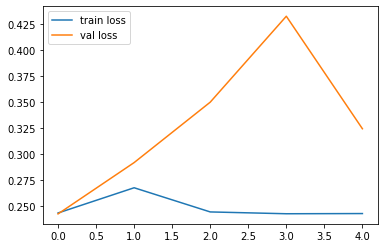

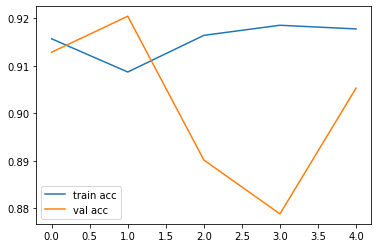

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt

#loss plot
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


#accuracy plot
plt.plot(r.history["accuracy"], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

y_pred = model.predict(test_set)
y_pred

array([[1.26654934e-03, 9.98733461e-01],
       [1.08350040e-02, 9.89165008e-01],
       [1.00356275e-02, 9.89964426e-01],
       [4.60969396e-02, 9.53903019e-01],
       [1.06039362e-04, 9.99893904e-01],
       [9.99946594e-01, 5.34557403e-05],
       [1.00000000e+00, 3.30637684e-10],
       [2.16926523e-02, 9.78307366e-01],
       [3.26010952e-04, 9.99673963e-01],
       [1.76535931e-03, 9.98234630e-01],
       [9.98495147e-03, 9.90015030e-01],
       [7.93781996e-01, 2.06217974e-01],
       [4.68207616e-03, 9.95317936e-01],
       [5.40665397e-03, 9.94593322e-01],
       [1.21186022e-04, 9.99878764e-01],
       [1.00000000e+00, 5.99186629e-12],
       [2.99208701e-01, 7.00791299e-01],
       [2.42658396e-04, 9.99757349e-01],
       [9.99998808e-01, 1.13955809e-06],
       [8.12023063e-04, 9.99188006e-01],
       [9.90301013e-01, 9.69895441e-03],
       [9.99751747e-01, 2.48223223e-04],
       [9.99912500e-01, 8.74737962e-05],
       [9.99383450e-01, 6.16569771e-04],
       [9.229230

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
model = load_model('model_vgg19.h5')

img = image.load_img('/content/cell_images/test/parasitized/C33P1thinF_IMG_20150619_115740a_cell_163.png', target_size = (224,224))
x = image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape
x  = x/255

In [ ]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
 p = model.predict(img_data)
 
 p

array([[0., 1.]], dtype=float32)

In [ ]:
a = np.argmax(p,axis=1)

if(a==1):
  print('Uninfected')
else:
  print("Infected")



Uninfected
